In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [21]:
train_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/train_df_lp.parquet")

In [22]:
val_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/val_df_lp.parquet")

In [23]:
test_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/Lavoro Programmato datasets/test_df_lp.parquet")

In [24]:
def plot_occurrences(df, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrame."""

    occurrences = df.sum(axis=0)
    occurrences = occurrences.sort_values(
        ascending=True
    )  # Ordina in modo ascendente per il grafico a barre orizzontali

    
    occurrences = occurrences[-50:]

    plt.figure(figsize=(15, 11))  # Aumenta le dimensioni del grafico

    plt.barh(
        occurrences.index, occurrences.values
    )  # Crea un grafico a barre orizzontali
    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
    plt.savefig(filename)
    plt.close()

In [25]:
plot_occurrences(train_df, "train_occurrences.png")
plot_occurrences(val_df, "val_occurrences.png")
plot_occurrences(test_df, "test_occurrences.png")

In [26]:
clusters_guasto_cavo_df = pd.read_csv("real-time clusters/20230101-20240101_real_time_clusters_filtered_guasto_cavo.csv")

In [29]:
train_df = pd.merge(train_df, clusters_guasto_cavo_df, on="cluster_id2", how="left")
val_df = pd.merge(val_df, clusters_guasto_cavo_df, on="cluster_id2", how="left")
test_df = pd.merge(test_df, clusters_guasto_cavo_df, on="cluster_id2", how="left")

In [33]:
train_counts = train_df['GUASTO CAVO'].value_counts()
val_counts = val_df['GUASTO CAVO'].value_counts()
test_counts = test_df['GUASTO CAVO'].value_counts()

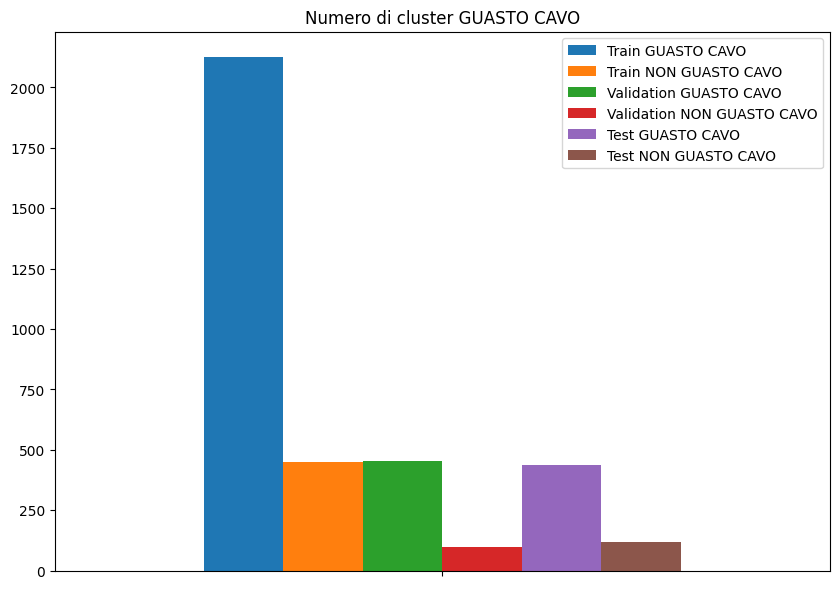

In [47]:
counts_df = pd.DataFrame({
    'Train GUASTO CAVO': [train_counts.get(True, 0)],
    'Train NON GUASTO CAVO': [train_counts.get(False, 0)],
    'Validation GUASTO CAVO': [val_counts.get(True, 0)],
    'Validation NON GUASTO CAVO': [val_counts.get(False, 0)],
    'Test GUASTO CAVO': [test_counts.get(True, 0)],
    'Test NON GUASTO CAVO': [test_counts.get(False, 0)]
})



ax = counts_df.plot(kind='bar', figsize=(10, 7), width=0.8)

plt.title("Numero di cluster GUASTO CAVO")
ax.set_xticklabels([])
plt.show()

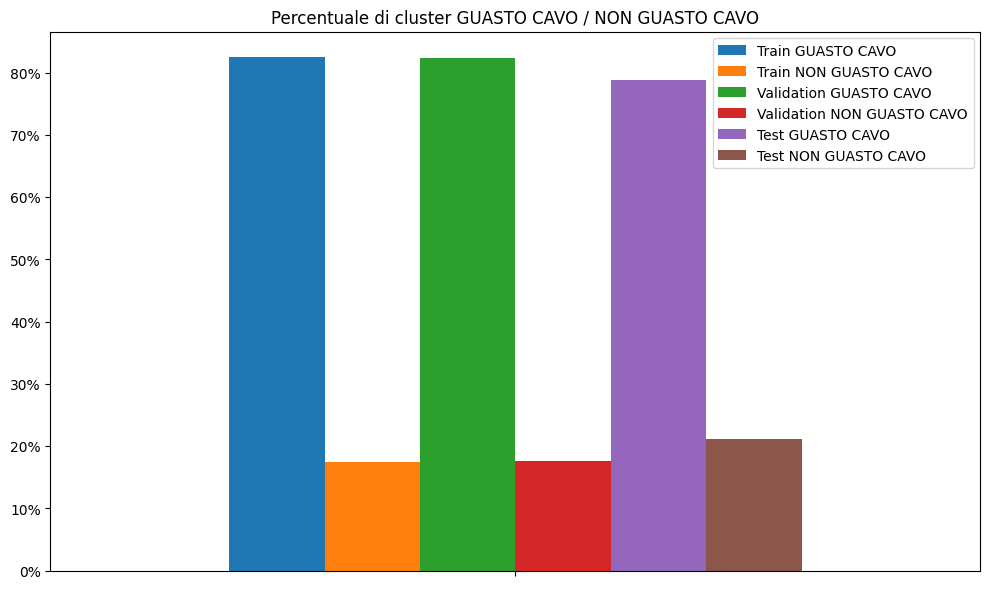

In [43]:
from matplotlib.ticker import FuncFormatter

total_train = train_counts.sum()
total_val = val_counts.sum()
total_test = test_counts.sum()


percent_counts_df = pd.DataFrame(
    {
        "Train GUASTO CAVO": [train_counts.get(True, 0) / total_train * 100],
        "Train NON GUASTO CAVO": [train_counts.get(False, 0) / total_train * 100],
        "Validation GUASTO CAVO": [val_counts.get(True, 0) / total_val * 100],
        "Validation NON GUASTO CAVO": [val_counts.get(False, 0) / total_val * 100],
        "Test GUASTO CAVO": [test_counts.get(True, 0) / total_test * 100],
        "Test NON GUASTO CAVO": [test_counts.get(False, 0) / total_test * 100],
    }
)



ax = percent_counts_df.plot(kind="bar", figsize=(12, 7), width=0.8)

ax.set_xticklabels([])

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)

plt.title("Percentuale di cluster GUASTO CAVO / NON GUASTO CAVO")

plt.show()